Problem 1 (20 points)

Show that the stationary point (zero gradient) of the function$$
\begin{aligned}
    f=2x_{1}^{2} - 4x_1 x_2+ 1.5x^{2}_{2}+ x_2
\end{aligned}
$$is a saddle (with indefinite Hessian). Find the directions of downslopes away from the saddle. Hint: Use Taylor's expansion at the saddle point. Find directions that reduce $f$.

![image info](./HW2_pic/HW2_1.GIF)

Problem 2 (50 points) 


(10 points) Find the point in the plane $x_1+2x_2+3x_3=1$ in $\mathbb{R}^3$ that is nearest to the point $(-1,0,1)^T$. Is this a convex problem? Hint: Convert the problem into an unconstrained problem using $x_1+2x_2+3x_3=1$.

(40 points) Implement the gradient descent and Newton's algorithm for solving the problem. Attach your codes along with a short summary including \
(1) the initial points tested, \
(2) corresponding solutions, \
(3) a log-linear convergence plot.

![image info](./HW2_pic/HW2_2.gif)

[-0.14245063  0.78544328] 0.07142881012993187


<ipython-input-9-b1f6caf2cf89>:32: RuntimeWarning: divide by zero encountered in log
  diff=np.log(fk-f(x))


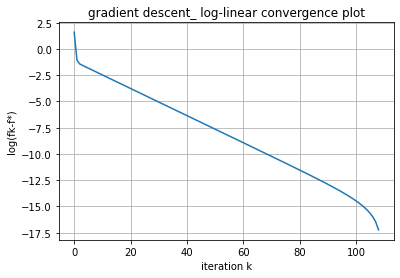

In [9]:
###problem2.gradient descent 
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: (2-2*x[0]-3*x[1])**2+x[0]**2+(x[1]-1)**2
def grad(x):
    return np.array([10*x[0] + 12*x[1] - 8, 12*x[0] + 20*x[1] - 14])

t = 0.5
eps=0.001
a = 1
x = np.array([0,0])
error=np.linalg.norm(grad(x))
k=0
soln=[x]
iter=[k]
fk=[f(x)]
def line_search(x, a, t):
    while (f(x)  - t * a * np.dot(grad(x), grad(x))- f(x - a*grad(x))) < 0:
        a = 0.5*a
    return a

while error>=eps:
    k = k+1
    a = line_search(x, a, t)
    x = x - a*(grad(x))
    soln.append(x)
    error=np.linalg.norm(grad(x))
    iter.append(k)
    fk.append(f(x))
    f(x)
    diff=np.log(fk-f(x))

print(x,  f(x))    
    
fig, ax = plt.subplots()
ax.plot(iter, diff)

ax.set(xlabel='iteration k', ylabel='log(fk-f*)',
       title='gradient descent_ log-linear convergence plot')
ax.grid()

fig.savefig("2_2(1).png")
plt.show()


[-0.14271763  0.78494699] 0.07143327168055945


<ipython-input-13-4e4ad99c14b4>:34: RuntimeWarning: divide by zero encountered in log
  diff=np.log(fk-f(x))


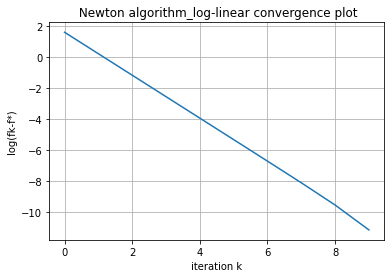

In [13]:
###problem2.Newton's algorithm  
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: (2-2*x[0]-3*x[1])**2+x[0]**2+(x[1]-1)**2
def grad(x):
    return np.array([10*x[0] + 12*x[1] - 8, 12*x[0] + 20*x[1] - 14])
H = np.array([[10,12],[12,20]])
t = 0.5
eps=0.001
a = 1
x = np.array([0,0])
def d(x):
    return np.dot(np.linalg.inv(H),grad(x))
error=np.linalg.norm(d(x))
k=0
soln=[x]
iter=[k]
fk=[f(x)]
def line_search(x, a, t):
    while (f(x)  - t * a * np.dot(grad(x),d(x))- f(x - a*d(x))) < 0:
        a = 0.5*a
    return a

while error>=eps:
    k = k+1
    a = line_search(x, a, t)
    x = x - a*(d(x))
    soln.append(x)
    error=np.linalg.norm(d(x))
    iter.append(k)
    fk.append(f(x))
    f(x)
    diff=np.log(fk-f(x))
print(x,  f(x))  
       
fig, ax = plt.subplots()
ax.plot(iter, diff)

ax.set(xlabel='iteration k', ylabel='log(fk-f*)',
       title=' Newton algorithm_log-linear convergence plot')
ax.grid()
fig.savefig("2_2(2).png")
plt.show()

summary: \
1)intial point [0,0]\
2)solutions x=[-0.14245063  0.78544328] f=0.07142881012993187 for gradient descent\
x=[-0.14271763  0.78494699] f=0.07143327168055945 for Newton's algorithm \
3)shown above

Problem 3 (10 points)

Let $f(x)$ and $g(x)$ be two convex functions defined on the convex set $\mathcal{X}$.

(5 points) Prove that $af(x)+bg(x)$ is convex for $a\gt0$ and $b\gt0;$.\
(5 points) In what conditions will $f(g(x))$ be convex?

![image info](./HW2_pic/HW2_3.gif)

Problem 4 (bonus 10 points)

Show that $f({\bf x}_1) \geq f(\textbf{x}_0) + 
    \textbf{g}_{\textbf{x}_0}^T(\textbf{x}_1-\textbf{x}_0)$ for a convex function $f(\textbf{x}): \mathcal{X} \rightarrow \mathbb{R}$ and for $\textbf{x}_0$, $\textbf{x}_1 \in \mathcal{X}$

![image info](./HW2_pic/HW2_3.gif)

Problem 5 (20 points)

Consider an illumination problem: There are $n$ lamps and $m$ mirrors fixed to the ground. The target reflection intensity level is $I_t$. The actual reflection intensity level on the $k$th mirror can be computed as $\textbf{a}_k^T \textbf{p}$, where $\textbf{a}_k$ is given by the distances between all lamps to the mirror, and $\textbf{p}:=[p_1,...,p_n]^T$ are the power output of the lamps. The objective is to keep the actual intensity levels as close to the target as possible by tuning the power output $\textbf{p}$.\

(5 points) Formulate this problem as an optimization problem.\
(5 points) Is your problem convex?\
(5 points) If we require the overall power output of any of the $n$ lamps to be less than $p^*$, will the problem have a unique solution?\
(5 points) If we require no more than half of the lamps to be switched on, will the problem have a unique solution?\


![image info](./HW2_pic/HW2_5.gif)